# SVM

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import eif as iso
import random as rn
import copy as copy

import time

In [2]:
df = pd.read_csv('imbd_cleaned.csv')

# Mappa di raggruppamento
category_mapping = {
    'movie': 'Film',
    'tvMovie': 'Film',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'Serie TV',
    'tvMiniSeries': 'Serie TV',
    'tvEpisode': 'Serie TV',
    'tvSpecial': 'Speciale TV',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

X = df.select_dtypes(include=['number'])

X = X.values
y = np.array(df['titleType'])

## Data Partitioning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

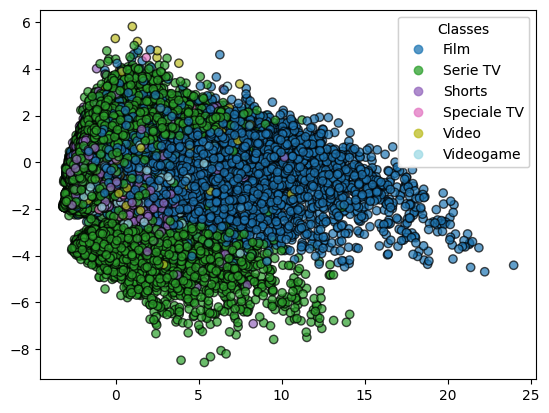

In [9]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Utilizza LabelEncoder per convertire le categorie in numeri
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Ora puoi usare y_train_numeric come argomento 'c' per plt.scatter
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric, cmap=plt.cm.tab20, edgecolor='k', alpha=0.7)

# Ottieni le etichette originali
labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Aggiungi la leggenda con le etichette originali
handles, _ = scatter.legend_elements()
legend1 = plt.legend(handles, labels, title="Classes")
plt.gca().add_artist(legend1)

# Mostra il grafico
plt.show()

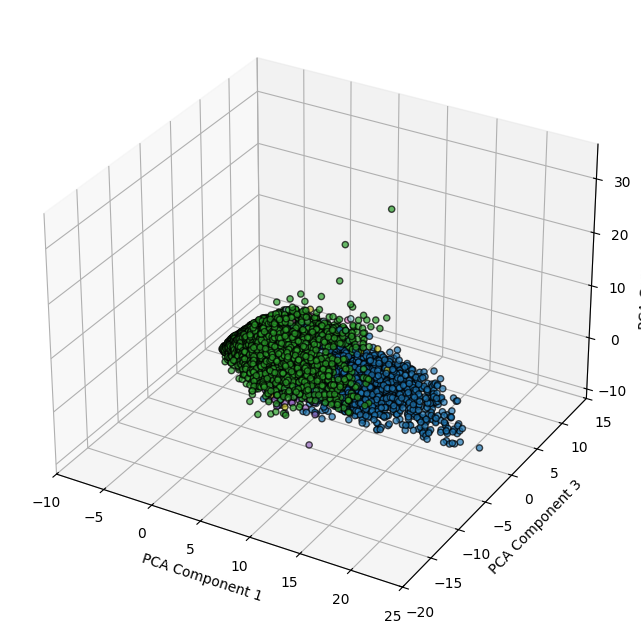

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assicurati che y_train sia definito
# y_train = <tuo array di etichette di training>

# Utilizza LabelEncoder per convertire le categorie in numeri
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Esegui PCA per ridurre a 3 componenti principali
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Crea una figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizza i dati in 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train_numeric, cmap=plt.cm.tab20, edgecolor='k', alpha=0.7)

# Aggiungi etichette agli assi
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 3')
ax.set_zlabel('PCA Component 2')

# Imposta i limiti sugli assi
ax.set_xlim([-10, 25])
ax.set_ylim([-20, 15])

# Mostra la figura
plt.show()

## Linear SVM

In [92]:
from sklearn.svm import LinearSVC

### K-fold and grid search

In [93]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i parametri da ottimizzare
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crea il modello LinearSVC
clf = LinearSVC(random_state=42)

# Configura la k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configura la grid search
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Ottieni i migliori parametri
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i migliori parametri
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predici i risultati sul test set
y_pred = best_clf.predict(X_test)

# Predici i risultati sul training set
y_train_pred = best_clf.predict(X_train)

# Stampa le metriche di valutazione per il training set
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))

# Stampa le metriche di valutazione per il test set
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri: {'C': 1}
Train Accuracy 0.8246505717916137
Train F1-score [0.83447235 0.88394079 0.62942648 0.         0.42115132 0.14347826]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.86      0.81      0.83     30208
    Serie TV       0.83      0.94      0.88     57158
      Shorts       0.72      0.56      0.63     11653
 Speciale TV       0.00      0.00      0.00       804
       Video       0.65      0.31      0.42      3604
   Videogame       0.73      0.08      0.14      1244

    accuracy                           0.82    104671
   macro avg       0.63      0.45      0.49    104671
weighted avg       0.81      0.82      0.81    104671

Test Accuracy 0.8223807400802496
Test F1-score [0.83074355 0.88322224 0.62224732 0.00576369 0.40832595 0.11584327]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.8

In [ ]:
# fare test

## Nonlinear SVM

In [94]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [95]:
# clf = SVC(gamma='auto')
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [96]:
# # Crea il modello SVM con kernel RBF
# model = SVC(kernel='rbf', gamma='scale')

# # Addestra il modello
# model.fit(X_train, y_train)

# # Fai previsioni
# y_pred = model.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i kernel da testare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Mantieni il parametro C a 0.001
C = 10

# Loop attraverso i diversi kernel
for kernel in kernels:
    print(f"Testing kernel: {kernel}")
    
    # Crea il modello SVM con il kernel specificato
    model = SVC(kernel=kernel, C=C, gamma='scale', random_state=42)
    
    # Addestra il modello
    model.fit(X_train, y_train)
    
    # Fai previsioni sul test set
    y_pred = model.predict(X_test)
    
    # Fai previsioni sul training set
    y_train_pred = model.predict(X_train)
    
    # Stampa le metriche di valutazione per il training set
    print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
    print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
    print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))
    print("\n")
    
    # Stampa le metriche di valutazione per il test set
    print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
    print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
    print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Testing kernel: linear
Train Accuracy 0.8363348014254187
Train F1-score [0.8455385  0.8886836  0.66823915 0.00496278 0.45143589 0.44573418]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.88      0.82      0.85     30208
    Serie TV       0.83      0.95      0.89     57158
      Shorts       0.76      0.60      0.67     11653
 Speciale TV       1.00      0.00      0.00       804
       Video       0.66      0.34      0.45      3604
   Videogame       0.80      0.31      0.45      1244

    accuracy                           0.84    104671
   macro avg       0.82      0.50      0.55    104671
weighted avg       0.83      0.84      0.82    104671



Test Accuracy 0.8349531876950512
Test F1-score [0.84379656 0.88764749 0.66358408 0.         0.45169601 0.42677824]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.88      0.81      0.84     12947
    Serie TV       0.83      0.9

Testing kernel: linear
Train Accuracy 0.8363348014254187
Train F1-score [0.8455385  0.8886836  0.66823915 0.00496278 0.45143589 0.44573418]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.88      0.82      0.85     30208
    Serie TV       0.83      0.95      0.89     57158
      Shorts       0.76      0.60      0.67     11653
 Speciale TV       1.00      0.00      0.00       804
       Video       0.66      0.34      0.45      3604
   Videogame       0.80      0.31      0.45      1244

    accuracy                           0.84    104671
   macro avg       0.82      0.50      0.55    104671
weighted avg       0.83      0.84      0.82    104671



Test Accuracy 0.8349531876950512
Test F1-score [0.84379656 0.88764749 0.66358408 0.         0.45169601 0.42677824]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.88      0.81      0.84     12947
    Serie TV       0.83      0.95      0.89     24496
      Shorts       0.76      0.59      0.66      4994
 Speciale TV       0.00      0.00      0.00       345
       Video       0.67      0.34      0.45      1545
   Videogame       0.83      0.29      0.43       533

    accuracy                           0.83     44860
   macro avg       0.66      0.50      0.55     44860
weighted avg       0.83      0.83      0.82     44860

Testing kernel: poly
Train Accuracy 0.902981723686599
Train F1-score [0.90359409 0.9421489  0.82003307 0.28421053 0.52525651 0.77947295]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.91      0.89      0.90     30208
    Serie TV       0.91      0.98      0.94     57158
      Shorts       0.83      0.81      0.82     11653
 Speciale TV       0.92      0.17      0.28       804
       Video       0.91      0.37      0.53      3604
   Videogame       0.92      0.68      0.78      1244

    accuracy                           0.90    104671
   macro avg       0.90      0.65      0.71    104671
weighted avg       0.90      0.90      0.90    104671



Test Accuracy 0.8944716897012929
Test F1-score [0.89435024 0.93889348 0.80399552 0.14177215 0.47031323 0.71599565]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.90      0.88      0.89     12947
    Serie TV       0.91      0.97      0.94     24496
      Shorts       0.82      0.79      0.80      4994
 Speciale TV       0.56      0.08      0.14       345
       Video       0.85      0.33      0.47      1545
   Videogame       0.85      0.62      0.72       533

    accuracy                           0.89     44860
   macro avg       0.81      0.61      0.66     44860
weighted avg       0.89      0.89      0.89     44860

Testing kernel: rbf
Train Accuracy 0.9297990847512683
Train F1-score [0.9258312  0.96476553 0.88384657 0.35329949 0.57508343 0.83211679]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.92      0.93      0.93     30208
    Serie TV       0.95      0.98      0.96     57158
      Shorts       0.86      0.91      0.88     11653
 Speciale TV       0.96      0.22      0.35       804
       Video       0.87      0.43      0.58      3604
   Videogame       0.89      0.78      0.83      1244

    accuracy                           0.93    104671
   macro avg       0.91      0.71      0.76    104671
weighted avg       0.93      0.93      0.92    104671



Test Accuracy 0.9194159607668302
Test F1-score [0.91238088 0.96088265 0.87132921 0.15816327 0.50690423 0.75051975]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.91      0.91      0.91     12947
    Serie TV       0.94      0.98      0.96     24496
      Shorts       0.84      0.90      0.87      4994
 Speciale TV       0.66      0.09      0.16       345
       Video       0.81      0.37      0.51      1545
   Videogame       0.84      0.68      0.75       533

    accuracy                           0.92     44860
   macro avg       0.84      0.65      0.69     44860
weighted avg       0.92      0.92      0.91     44860

Testing kernel: sigmoid
Train Accuracy 0.643807740443867
Train F1-score [0.61714737 0.75706153 0.30744596 0.01502347 0.31870942 0.15835777]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.55      0.70      0.62     30208
    Serie TV       0.78      0.73      0.76     57158
      Shorts       0.32      0.30      0.31     11653
 Speciale TV       0.03      0.01      0.02       804
       Video       0.55      0.22      0.32      3604
   Videogame       0.29      0.11      0.16      1244

    accuracy                           0.64    104671
   macro avg       0.42      0.35      0.36    104671
weighted avg       0.65      0.64      0.64    104671



Test Accuracy 0.6409496210432456
Test F1-score [0.61454234 0.75501043 0.30435232 0.01287554 0.29749768 0.17135207]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.55      0.69      0.61     12947
    Serie TV       0.78      0.73      0.76     24496
      Shorts       0.31      0.29      0.30      4994
 Speciale TV       0.02      0.01      0.01       345
       Video       0.52      0.21      0.30      1545
   Videogame       0.30      0.12      0.17       533

    accuracy                           0.64     44860
   macro avg       0.42      0.34      0.36     44860
weighted avg       0.64      0.64      0.64     44860


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Definisci il kernel da testare
kernel = 'rbf'

# Mantieni il parametro C a 10
C = 10

# Crea il modello SVM con il kernel specificato
model = SVC(kernel=kernel, C=C, gamma='scale', random_state=42, probability=True)

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni sul test set
y_prob = model.predict_proba(X_test)

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

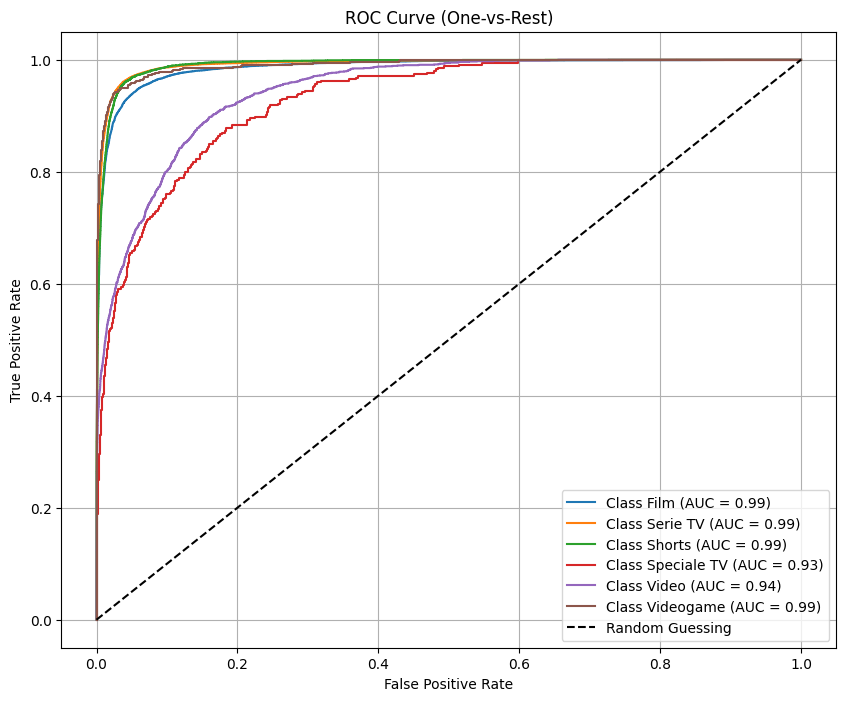

In [11]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [14]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_prob, multi_class="ovr", average="macro")

np.float64(0.9719157700735415)

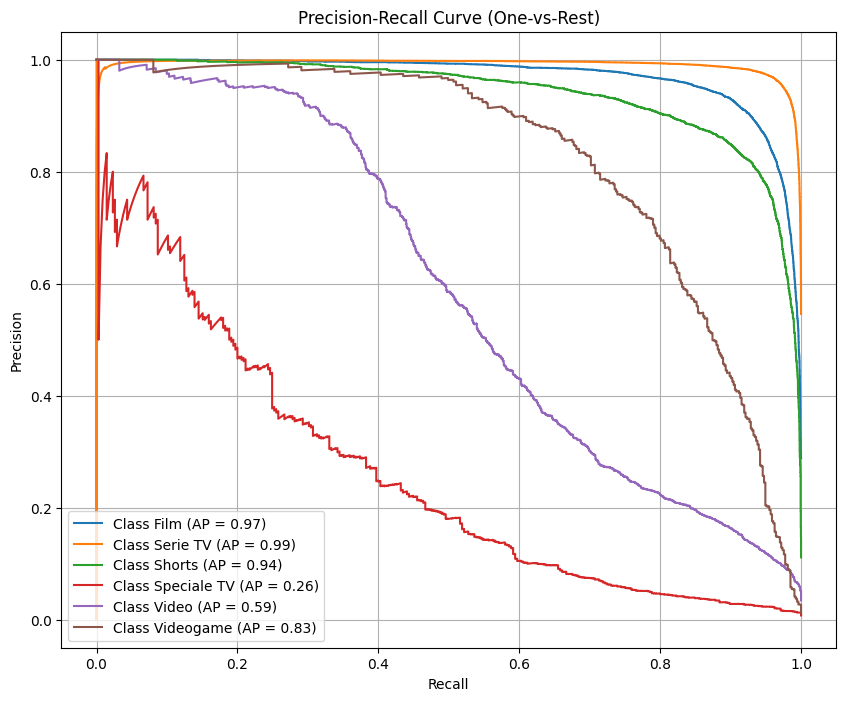

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()

## Subset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV, PredefinedSplit, GridSearchCV

best_hyper = []
    
for _ in range(10):
    # Stratified subsampling del 10% per la variabile 'title_type'
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

    for train_index, test_index in stratified_split.split(X_train, y_train):
        strat_subset_X = X_train[test_index]
        strat_subset_y = y_train[test_index]

    # sub-train e validation
    subset_X_train, subset_X_val, subset_y_train, subset_y_val = train_test_split(strat_subset_X, strat_subset_y, test_size=0.3, random_state=100, stratify=strat_subset_y)

    # 2️⃣ Creare un array per il PredefinedSplit (-1 = train, 0 = validation)
    split_index = np.concatenate([-np.ones(len(subset_X_train)), np.zeros(len(subset_X_val))])
    ps = PredefinedSplit(test_fold=split_index)

    # 3️⃣ Definire la distribuzione dei parametri per la ricerca casuale
    param_dist = {
        'C': np.logspace(-2, 2, 10),  # Valori di C tra 0.001 e 1000
        'gamma': np.logspace(-3, 1, 10),  # Valori di gamma tra 0.0001 e 100
        'kernel': ['rbf'], #, 'poly', 'sigmoid'
        # 'degree': np.arange(2, 6)  # Solo per il kernel polinomiale
    }

    # 4️⃣ Eseguire la RandomizedSearchCV con l'holdout
    random_search = GridSearchCV(
        SVC(),
        param_grid = param_dist,
        # param_distributions=param_dist,
        # n_iter=4,  # Numero di combinazioni casuali da provare
        scoring='accuracy',
        cv=ps,  # Usa il PredefinedSplit per l'holdout
        n_jobs=-1,
        # random_state=42
    )

    random_search.fit(strat_subset_X, strat_subset_y)

    # 6️⃣ Mostrare i migliori parametri trovati
    print("Migliori parametri:", random_search.best_params_)
    print("Miglior accuracy:", random_search.best_score_)   

    best_hyper.append(random_search.best_params_)
    
# Calcola la media dei migliori C trovati
avg_best_C = np.median([params['C'] for params in best_hyper])
avg_best_gamma = np.median([params['gamma'] for params in best_hyper if isinstance(params['gamma'], float)])

print("Media dei migliori parametri trovati:")
print("C:", avg_best_C)
print("Gamma:", avg_best_gamma)

Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8933460681311685
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8904807386182745
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8888888888888888
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8837949697548552
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8767908309455588
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8958930276981852
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Crea il modello SVM con kernel RBF e i parametri forniti
model = SVC(kernel='rbf', C=35.93813663804626, gamma=0.05994842503189409, probability=True)

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


NameError: name 'label_binarize' is not defined

In [13]:
from sklearn.preprocessing import label_binarize

classes = np.unique(df['titleType'])

# Binarizza le etichette di test
y_test_binarized = label_binarize(y_test, classes=classes)

# Stampa i risultati
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9243069884273796
F1-score [0.91615086 0.96743939 0.87647691 0.26008969 0.53868195 0.74696356]
              precision    recall  f1-score   support

        Film       0.90      0.93      0.92     12835
    Serie TV       0.96      0.97      0.97     24351
      Shorts       0.86      0.90      0.88      4992
 Speciale TV       0.56      0.17      0.26       343
       Video       0.73      0.43      0.54      1541
   Videogame       0.80      0.70      0.75       526

    accuracy                           0.92     44588
   macro avg       0.80      0.68      0.72     44588
weighted avg       0.92      0.92      0.92     44588



array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri: {'C': 1}
Train Accuracy 0.8246505717916137
Train F1-score [0.83447235 0.88394079 0.62942648 0.         0.42115132 0.14347826]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.86      0.81      0.83     30208
    Serie TV       0.83      0.94      0.88     57158
      Shorts       0.72      0.56      0.63     11653
 Speciale TV       0.00      0.00      0.00       804
       Video       0.65      0.31      0.42      3604
   Videogame       0.73      0.08      0.14      1244

    accuracy                           0.82    104671
   macro avg       0.63      0.45      0.49    104671
weighted avg       0.81      0.82      0.81    104671

Test Accuracy 0.8223807400802496
Test F1-score [0.83074355 0.88322224 0.62224732 0.00576369 0.40832595 0.11584327]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.86      0.81      0.83     12947
    Serie TV       0.83      0.95      0.88     24496
...
    accuracy                           0.82     44860
   macro avg       0.70      0.45      0.48     44860
weighted avg       0.81      0.82      0.81     44860

Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

np.float64(0.9719157700735415)

Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8933460681311685
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8904807386182745
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8888888888888888
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8837949697548552
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8767908309455588
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8958930276981852
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8876154091053805
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.8796561604584527
Migliori parametri: {'C': np.float64(35.93813663804626), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8857051894301178
Migliori parametri: {'C': np.float64(100.0), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.8844317096466093
Media dei migliori parametri trovati:
C: 67.96906831902314
Gamma: 0.044586793779263986
Accuracy 0.922046366473473
F1-score [0.9124163  0.96518719 0.87850102 0.21967963 0.52434457 0.74180328]
              precision    recall  f1-score   support

        Film       0.90      0.92      0.91     12947
    Serie TV       0.95      0.98      0.97     24496
      Shorts       0.86      0.90      0.88      4994
 Speciale TV       0.52      0.14      0.22       345
       Video       0.73      0.41      0.52      1545
   Videogame       0.82      0.68      0.74       533

    accuracy                           0.92     44860
   macro avg       0.80      0.67      0.71     44860
weighted avg       0.92      0.92      0.92     44860

#### ROC

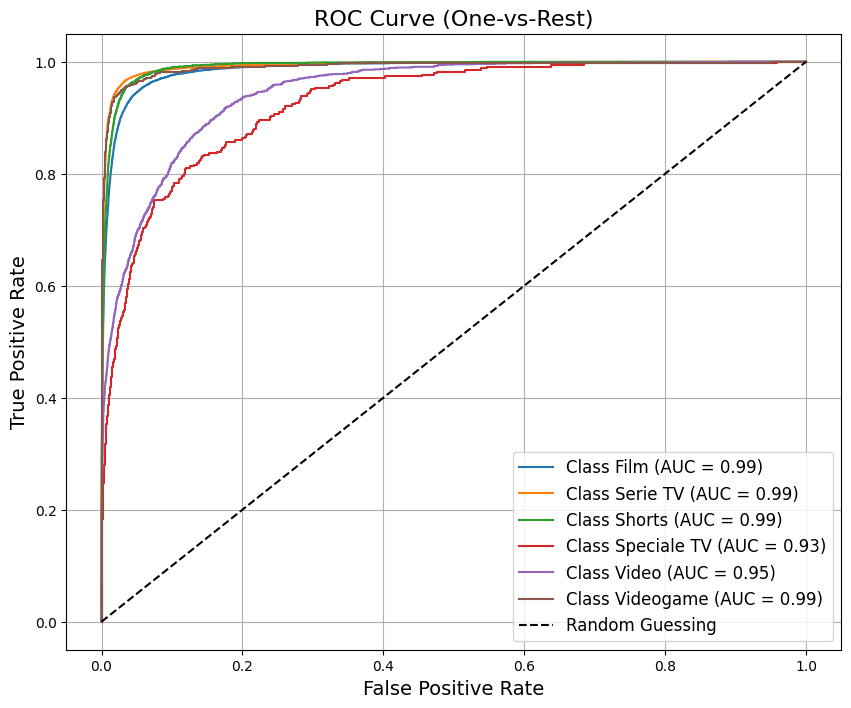

In [16]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

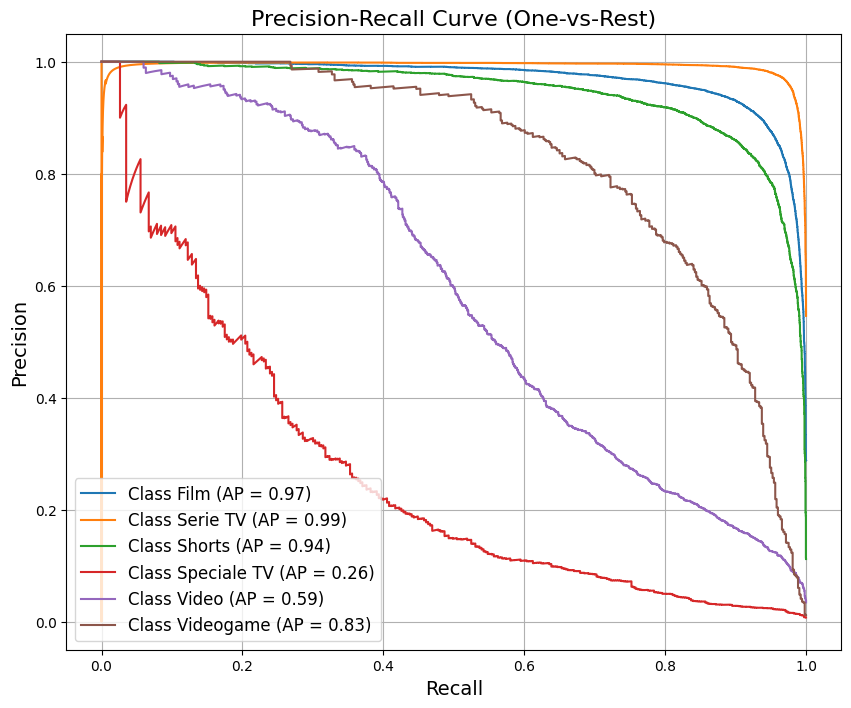

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()